# 第８章 サポートベクトルマシン

## 8.1 最適な境界

## 8.2 最適化の理論

## 8.3 サポートベクトルマシンの解

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn  #正規乱数

/home/yuma/.cache/pypoetry/virtualenvs/statistical-learning-with-python-gf79ENdJ-py3.6/lib/python3.6/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
import cvxopt
from cvxopt import matrix

In [3]:
a = randn(1)
b = randn(1)
n = 100
X = randn(n, 2)
y = np.sign(a * X[:, 0] + b * X[:, 1] + 0.1 * randn(n))
y = y.reshape(-1, 1)  #形を明示してわたす必要がある

In [4]:
def svm_1(X, y, C):
    eps = 0.0001
    n = X.shape[0]
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            P[i, j] = np.dot(X[i, :], X[j, :]) * y[i] * y[j]
    #パッケージにあるmatrix関数を使って指定する必要がある
    P = matrix(P + np.eye(n) * eps)
    A = matrix(-y.T.astype(np.float))
    b = matrix(np.array([0]).astype(np.float))
    h = matrix(np.array([C] * n + [0] * n).reshape(-1, 1).astype(np.float))
    G = matrix(np.concatenate([np.diag(np.ones(n)), np.diag(-np.ones(n))]))
    q = matrix(np.array([-1] * n).astype(np.float))
    res = cvxopt.solvers.qp(P, q, A=A, b=b, G=G, h=h)  # ソルバーの実行
    alpha = np.array(res['x'])  #xが本文中のalphaに対応
    beta = ((alpha * y).T @ X).reshape(2, 1)
    index = np.arange(0, n, 1)
    index_1 = index[eps < alpha[:, 0]]
    index_2 = index[(alpha < C - eps)[:, 0]]
    index = np.concatenate((index_1, index_2))
    beta_0 = np.mean(y[index] - X[index, :] @ beta)
    return {'beta': beta, 'beta_0': beta_0}

In [5]:
n = 10
matrix(np.concatenate([np.diag(np.ones(2)), np.diag(-np.ones(2))]))

<4x2 matrix, tc='d'>

     pcost       dcost       gap    pres   dres
 0: -1.6555e+02 -9.7472e+03  3e+04  1e+00  1e-14
 1: -2.1354e+01 -3.8677e+03  6e+03  1e-01  1e-14
 2:  7.2834e+01 -5.4953e+02  8e+02  2e-02  2e-14
 3:  6.5517e-01 -1.0587e+02  1e+02  1e-03  9e-15
 4: -3.0354e+01 -8.8382e+01  6e+01  6e-04  7e-15
 5: -4.4024e+01 -7.1135e+01  3e+01  3e-04  5e-15
 6: -5.1784e+01 -6.0827e+01  9e+00  7e-05  6e-15
 7: -5.5181e+01 -5.7220e+01  2e+00  9e-06  6e-15
 8: -5.6011e+01 -5.6296e+01  3e-01  5e-07  6e-15
 9: -5.6145e+01 -5.6147e+01  3e-03  5e-09  7e-15
10: -5.6146e+01 -5.6146e+01  3e-05  5e-11  6e-15
Optimal solution found.


{'beta': array([[1.18192241],
        [8.3152645 ]]),
 'beta_0': -0.7702810074074408}

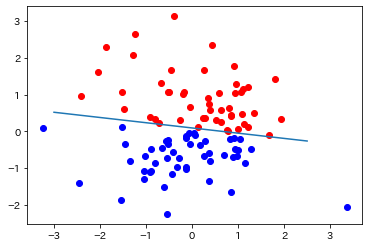

In [6]:
a = randn(1)
b = randn(1)
n = 100
X = randn(n, 2)
y = np.sign(a * X[:, 0] + b * X[:, 1] + 0.1 * randn(n))
y = y.reshape(-1, 1)  #形を明示してわたす必要がある
for i in range(n):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], c="red")
    else:
        plt.scatter(X[i, 0], X[i, 1], c="blue")
res = svm_1(X, y, C=10)


def f(x):
    return -res['beta_0'] / res['beta'][1] - x * res['beta'][0] / res['beta'][1]


x_seq = np.arange(-3, 3, 0.5)
plt.plot(x_seq, f(x_seq))
res

## 8.4 カーネルを用いたサポートベクトルマシンの拡張

In [7]:
def K_linear(x, y):
    return x.T @ y


def K_poly(x, y):
    return (1 + x.T @ y)**2

In [8]:
def svm_2(X, y, C, K):
    eps = 0.0001
    n = X.shape[0]
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            P[i, j] = K(X[i, :], X[j, :]) * y[i] * y[j]
    #パッケージにあるmatrix関数を使って指定する必要がある
    P = matrix(P + np.eye(n) * eps)
    A = matrix(-y.T.astype(np.float))
    b = matrix(np.array([0]).astype(np.float))
    h = matrix(np.array([C] * n + [0] * n).reshape(-1, 1).astype(np.float))
    G = matrix(np.concatenate([np.diag(np.ones(n)), np.diag(-np.ones(n))]))
    q = matrix(np.array([-1] * n).astype(np.float))
    res = cvxopt.solvers.qp(P, q, A=A, b=b, G=G, h=h)
    alpha = np.array(res['x'])  #xが本文中のalphaに対応
    beta = ((alpha * y).T @ X).reshape(2, 1)
    index = np.arange(0, n, 1)
    index_1 = index[eps < alpha[:, 0]]
    index_2 = index[(alpha < C - eps)[:, 0]]
    index = np.concatenate((index_1, index_2))
    beta_0 = np.mean(y[index] - X[index, :] @ beta)
    return {'alpha': alpha, 'beta': beta, 'beta_0': beta_0}

In [9]:
# 実行
a = 3
b = -1
n = 200
X = randn(n, 2)
y = np.sign(a * X[:, 0] + b * X[:, 1]**2 + 0.3 * randn(n))
y = y.reshape(-1, 1)

In [10]:
def plot_kernel(K, line):  #引数lineで線の種類を指定する
    res = svm_2(X, y, 1, K)
    alpha = res['alpha'][:, 0]
    beta_0 = res['beta_0']

    def f(u, v):
        S = beta_0
        for i in range(X.shape[0]):
            S = S + alpha[i] * y[i] * K(X[i, :], [u, v])
        return S[0]

    uu = np.arange(-2, 2, 0.1)
    vv = np.arange(-2, 2, 0.1)
    ww = []
    for v in vv:
        w = []
        for u in uu:
            w.append(f(u, v))
        ww.append(w)
    plt.contour(uu, vv, ww, levels=0, linestyles=line)

     pcost       dcost       gap    pres   dres
 0: -6.6808e+01 -4.8212e+02  3e+03  3e+00  2e-14
 1: -4.2157e+01 -3.0844e+02  5e+02  5e-01  1e-14
 2: -2.5147e+01 -1.1942e+02  1e+02  1e-01  8e-15
 3: -2.2925e+01 -4.3543e+01  3e+01  2e-02  3e-15
 4: -2.5168e+01 -3.2753e+01  1e+01  5e-03  3e-15
 5: -2.6243e+01 -2.8993e+01  3e+00  1e-03  3e-15
 6: -2.6849e+01 -2.7766e+01  1e+00  3e-04  4e-15
 7: -2.7102e+01 -2.7341e+01  2e-01  1e-05  4e-15
 8: -2.7209e+01 -2.7214e+01  5e-03  2e-08  4e-15
 9: -2.7211e+01 -2.7211e+01  1e-04  3e-10  4e-15
10: -2.7211e+01 -2.7211e+01  2e-06  3e-12  5e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9387e+01 -4.3619e+02  2e+03  2e+00  4e-15
 1: -5.3241e+01 -2.6967e+02  4e+02  3e-01  2e-15
 2: -4.4913e+01 -8.2217e+01  5e+01  2e-02  4e-15
 3: -5.1042e+01 -6.0201e+01  1e+01  5e-03  2e-15
 4: -5.2927e+01 -5.7245e+01  5e+00  2e-03  2e-15
 5: -5.4392e+01 -5.5085e+01  7e-01  2e-04  2e-15
 6: -5.4681e+01 -5.4727e+01  5e-02  1e-05  3e-1

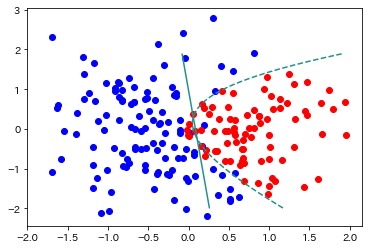

In [11]:
for i in range(n):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], c="red")
    else:
        plt.scatter(X[i, 0], X[i, 1], c="blue")
plot_kernel(K_poly, line="dashed")
plot_kernel(K_linear, line="solid")

In [12]:
import sklearn
from sklearn import svm

In [13]:
x = randn(200, 2)
x[0:100, ] = x[0:100, ] + 2
x[100:150, ] = x[100:150, ] - 2
y = np.concatenate(([1 for i in range(150)], [2 for i in range(50)]))

In [14]:
train = np.random.choice(200, 100, replace=False)
test = list(set(range(200)) - set(train))
res_svm = svm.SVC(kernel="rbf", gamma=1, C=100)  #チューニングなしのSVM

In [15]:
res_svm.fit(x[train, ], y[train])  #実行

SVC(C=100, gamma=1)

In [16]:
res_svm.predict(x[test, ])  #テストデータの予測結果

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2])

In [17]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

/home/yuma/.cache/pypoetry/virtualenvs/statistical-learning-with-python-gf79ENdJ-py3.6/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


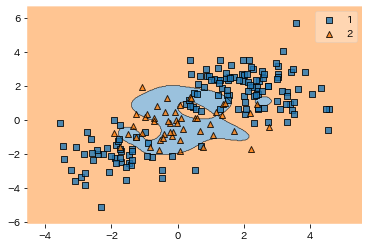

In [18]:
plot_decision_regions(x, y, clf=res_svm)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.5, 1, 2, 3, 4]}

In [21]:
tune = GridSearchCV(svm.SVC(), grid, cv=10)
tune.fit(x[train, ], y[train])

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.5, 1, 2, 3, 4]})

In [22]:
tune.best_params_  #C=1, gamma=0.5が最適だとわかる

{'C': 1, 'gamma': 0.5}

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x = iris.data
y = iris.target
train = np.random.choice(150, 120, replace=False)
test = np.ones(150, dtype=bool)
test[train] = False

In [24]:
iris_svm = svm.SVC(kernel="rbf", gamma=1, C=10)
iris_svm.fit(x[train, ], y[train])

SVC(C=10, gamma=1)

In [25]:
# 2章で定義した関数table_count (再掲)
def table_count(m, u, v):
    n = u.shape[0]
    count = np.zeros([m, m])
    for i in range(n):
        count[int(u[i]), int(v[i])] += 1
    return (count)

In [26]:
y_pre = iris_svm.predict(x[test, ])
table_count(3, y[test], y_pre)

array([[ 9.,  0.,  0.],
       [ 0., 11.,  1.],
       [ 0.,  0.,  9.]])